<IPython.core.display.Javascript object>


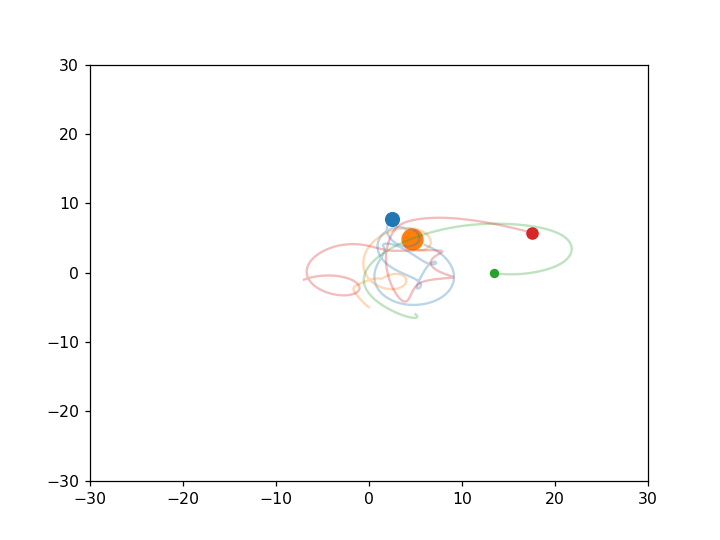

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

fig = plt.figure()
ax = plt.axes(xlim=(-30, 30), ylim=(-30, 30))

class Planet:
    def __init__(self,
                 name = "Orbital Body",
                 mass = 1.0,
                 x = 0.0, y = 0.0, 
                 vx = 0.0, vy = 0.0,
                 ):
        self.name = name
        self.mass = mass
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        
# class SolarSystem:
    
#     def __init__(self, planets = []):
#         self.planets = planets

planet1 = Planet(
            name = 'Planet1',
            mass = 3.0,
            x = 6, y = 4,
            vx = 2, vy = -1)
planet2 = Planet(
            name = 'Planet2',
            mass = 7.0,
            x = 0, y = -5,
            vx = -1, vy = 1)
planet3 = Planet(
            name = 'Planet3',
            mass = 1.0,
            x = 5, y = -6,
            vx = 1, vy = -1)
planet4 = Planet(
            name = 'Planet4',
            mass = 2.0,
            x = -7, y = -1,
            vx = 2, vy = 1)

# solar_system = SolarSystem(planets = [planet1, planet2])

p1pos, = ax.plot([planet1.x], [planet1.y], 'o', color='tab:blue', markersize = 5 * np.sqrt(planet1.mass))
p2pos, = ax.plot([planet2.x], [planet2.y], 'o', color='tab:orange', markersize = 5 * np.sqrt(planet2.mass))
p3pos, = ax.plot([planet3.x], [planet3.y], 'o', color='tab:green', markersize = 5 * np.sqrt(planet3.mass))
p4pos, = ax.plot([planet4.x], [planet4.y], 'o', color='tab:red', markersize = 5 * np.sqrt(planet4.mass))

p1trail, = ax.plot([planet1.x], [planet1.y], '-', color='tab:blue', alpha=0.3)
p2trail, = ax.plot([planet2.x], [planet2.y], '-', color='tab:orange', alpha=0.3)
p3trail, = ax.plot([planet3.x], [planet3.y], '-', color='tab:green', alpha=0.3)
p4trail, = ax.plot([planet4.x], [planet4.y], '-', color='tab:red', alpha=0.3)

p1x = [planet1.x]
p1y = [planet1.y]
p2x = [planet2.x]
p2y = [planet2.y]
p3x = [planet3.x]
p3y = [planet3.y]
p4x = [planet4.x]
p4y = [planet4.y]


G = 1e1
dt = 0.01

def accelerate(body1, body2, body3, body4):
    # body1 is the reference frame
    dx2 = body1.x - body2.x
    dy2 = body1.y - body2.y
    dist2 = np.sqrt(dx2**2 + dy2**2)
    
    dx3 = body1.x - body3.x
    dy3 = body1.y - body3.y
    dist3 = np.sqrt(dx3**2 + dy3**2)
    
    dx4 = body1.x - body4.x
    dy4 = body1.y - body4.y
    dist4 = np.sqrt(dx4**2 + dy4**2)
    
    if dist2 >= 0.5:
        ax2 = - G * body2.mass / dist2**2 * dx2 / dist2
        ay2 = - G * body2.mass / dist2**2 * dy2 / dist2
    else:
        ax2 = 0
        ay2 = 0
        
    if dist3 >= 0.5:
        ax3 = - G * body3.mass / dist3**2 * dx3 / dist3
        ay3 = - G * body3.mass / dist3**2 * dy3 / dist3
    else:
        ax3 = 0
        ay3 = 0       
        
    if dist4 >= 0.5:
        ax4 = - G * body4.mass / dist4**2 * dx4 / dist4
        ay4 = - G * body4.mass / dist4**2 * dy4 / dist4
    else:
        ax4 = 0
        ay4 = 0  
    
    ax = ax2 + ax3 + ax4
    ay = ay2 + ay3 + ay4
    
    return ax, ay

def init():        

    p1pos.set_data([planet1.x], [planet1.y])
    p2pos.set_data([planet2.x], [planet2.y])
    p3pos.set_data([planet3.x], [planet3.y])
    p4pos.set_data([planet4.x], [planet4.y])
    
    return p1pos, p2pos, p3pos, p4pos,

# animation function.  This is called sequentially
def animate(i):
    
    ax, ay = accelerate(planet1, planet2, planet3, planet4)

    planet1.vx += ax * dt
    planet1.vy += ay * dt
    
    ax, ay = accelerate(planet2, planet1, planet3, planet4)
    
    planet2.vx += ax * dt
    planet2.vy += ay * dt
    
    ax, ay = accelerate(planet3, planet1, planet2, planet4)
    
    planet3.vx += ax * dt
    planet3.vy += ay * dt
    
    ax, ay = accelerate(planet4, planet1, planet2, planet3)

    planet4.vx += ax * dt
    planet4.vy += ay * dt
    
    planet1.x += planet1.vx * dt
    planet1.y += planet1.vy * dt
    
    planet2.x += planet2.vx * dt
    planet2.y += planet2.vy * dt
    
    planet3.x += planet3.vx * dt
    planet3.y += planet3.vy * dt

    planet4.x += planet4.vx * dt
    planet4.y += planet4.vy * dt    
    
    p1x.append(planet1.x)
    p1y.append(planet1.y)
    p2x.append(planet2.x)
    p2y.append(planet2.y)
    p3x.append(planet3.x)
    p3y.append(planet3.y)
    p4x.append(planet4.x)
    p4y.append(planet4.y)

    p1pos.set_data(p1x[i], p1y[i])
    p2pos.set_data(p2x[i], p2y[i])
    p3pos.set_data(p3x[i], p3y[i])
    p4pos.set_data(p4x[i], p4y[i])
    
    p1trail.set_data(p1x[:i], p1y[:i])
    p2trail.set_data(p2x[:i], p2y[:i])
    p3trail.set_data(p3x[:i], p3y[:i])
    p4trail.set_data(p4x[:i], p4y[:i])
    
    return p1pos, p2pos, p3pos, p4pos

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=2000, interval=1, blit=True)

# writervideo = animation.FFMpegWriter(fps=30) 
# anim.save("planets1.mp4", writer=writervideo)
plt.show()

<IPython.core.display.Javascript object>


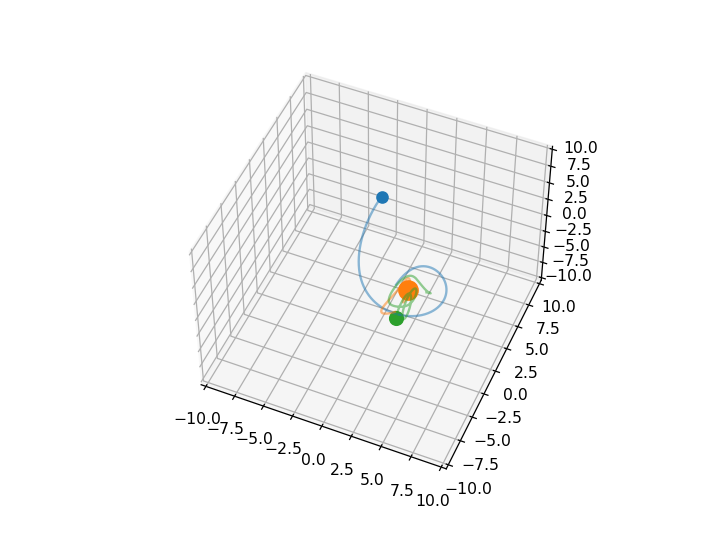

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

fig = plt.figure()
# ax = plt.axes(xlim=(-10, 10), ylim=(-10, 10))
ax = plt.axes(projection='3d')
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_zlim(-10,10)

class Planet:
    def __init__(self,
                 name = "Orbital Body",
                 mass = 1.0,
                 x = 0.0, y = 0.0, z = 0.0, 
                 vx = 0.0, vy = 0.0, vz = 0.0,
                 ):
        self.name = name
        self.mass = mass
        self.x = x
        self.y = y
        self.z = z
        self.vx = vx
        self.vy = vy
        self.vz = vz
        
# class SolarSystem:
    
#     def __init__(self, planets = []):
#         self.planets = planets

planet1 = Planet(
            name = 'Planet1',
            mass = 2.0,
            x = 1, y = 2, z = -5,
            vx = 1, vy = 2, vz = 3)
planet2 = Planet(
            name = 'Planet2',
            mass = 6.0,
            x = 3, y = -3, z = -1,
            vx = -1, vy = -1, vz = 0)
planet3 = Planet(
            name = 'Planet3',
            mass = 3.0,
            x = 4, y = 1, z = -3,
            vx = 1, vy = 1, vz = -1)

# solar_system = SolarSystem(planets = [planet1, planet2])

p1pos, = ax.plot([planet1.x], [planet1.y], [planet1.z], color='tab:blue', marker='o', markersize = 5 * np.sqrt(planet1.mass))
p2pos, = ax.plot([planet2.x], [planet2.y], [planet2.z], color='tab:orange', marker='o', markersize = 5 * np.sqrt(planet2.mass))
p3pos, = ax.plot([planet3.x], [planet3.y], [planet3.z], color='tab:green', marker='o', markersize = 5 * np.sqrt(planet3.mass))

p1trail, = ax.plot([planet1.x], [planet1.y], [planet1.z], color='tab:blue', ls='-', alpha = 0.5)
p2trail, = ax.plot([planet2.x], [planet2.y], [planet2.z], color='tab:orange', ls='-', alpha = 0.5)
p3trail, = ax.plot([planet3.x], [planet3.y], [planet3.z], color='tab:green', ls='-', alpha = 0.5)

p1x = [planet1.x]
p1y = [planet1.y]
p1z = [planet1.z]

p2x = [planet2.x]
p2y = [planet2.y]
p2z = [planet2.z]

p3x = [planet3.x]
p3y = [planet3.y]
p3z = [planet3.z]

G = 1e1
dt = 1e-2

def accelerate(body1, body2, body3):
    # body1 is the reference frame
    dx2 = body1.x - body2.x
    dy2 = body1.y - body2.y
    dz2 = body1.z - body2.z
    dist2 = np.sqrt(dx2**2 + dy2**2 + dz2**2)
    
    dx3 = body1.x - body3.x
    dy3 = body1.y - body3.y
    dz3 = body1.z - body3.z
    dist3 = np.sqrt(dx3**2 + dy3**2 + dz3**2)

    if dist2 >= 0.5:
        ax2 = - G * body2.mass / dist2**2 * dx2 / dist2
        ay2 = - G * body2.mass / dist2**2 * dy2 / dist2
        az2 = - G * body2.mass / dist2**2 * dz2 / dist2
    else:
        ax2 = 0
        ay2 = 0
        az2 = 0
        
    if dist3 >= 0.5:
        ax3 = - G * body3.mass / dist3**2 * dx3 / dist3
        ay3 = - G * body3.mass / dist3**2 * dy3 / dist3
        az3 = - G * body3.mass / dist3**2 * dz3 / dist3
    else:
        ax3 = 0
        ay3 = 0
        az3 = 0
    
    ax = ax2 + ax3
    ay = ay2 + ay3
    az = az2 + az3
    
    return ax, ay, az

def init():        
    p1pos.set_data([planet1.x], [planet1.y])
    p1pos.set_3d_properties([planet1.z])
    
    p2pos.set_data([planet2.x], [planet2.y])
    p2pos.set_3d_properties([planet2.z])
    
    p3pos.set_data([planet3.x], [planet3.y])
    p3pos.set_3d_properties([planet3.z])
    
    return p1pos, p2pos, p3pos,

# animation function.  This is called sequentially
def animate(i):
    
    ax, ay, az = accelerate(planet1, planet2, planet3)
    
    planet1.vx += ax * dt
    planet1.vy += ay * dt
    planet1.vz += az * dt
    
    ax, ay, az = accelerate(planet2, planet1, planet3)
    
    planet2.vx += ax * dt
    planet2.vy += ay * dt
    planet2.vz += az * dt
    
    ax, ay, az = accelerate(planet3, planet1, planet2)
    
    planet3.vx += ax * dt
    planet3.vy += ay * dt
    planet3.vz += az * dt
    
    planet1.x += planet1.vx * dt
    planet1.y += planet1.vy * dt
    planet1.z += planet1.vz * dt
    
    planet2.x += planet2.vx * dt
    planet2.y += planet2.vy * dt
    planet2.z += planet2.vz * dt
    
    planet3.x += planet3.vx * dt
    planet3.y += planet3.vy * dt
    planet3.z += planet3.vz * dt
    
    p1x.append(planet1.x)
    p1y.append(planet1.y)
    p1z.append(planet1.z)
    
    p2x.append(planet2.x)
    p2y.append(planet2.y)
    p2z.append(planet2.z)

    p3x.append(planet3.x)
    p3y.append(planet3.y)
    p3z.append(planet3.z)
    
    p1pos.set_data(p1x[i], p1y[i])
    p1pos.set_3d_properties([p1z[i]])
    
    p2pos.set_data(p2x[i], p2y[i])
    p2pos.set_3d_properties([p2z[i]])
    
    p3pos.set_data(p3x[i], p3y[i])
    p3pos.set_3d_properties([p3z[i]])

    p1trail.set_data(p1x[:i], p1y[:i])
    p1trail.set_3d_properties([p1z[:i]])
    
    p2trail.set_data(p2x[:i], p2y[:i])
    p2trail.set_3d_properties([p2z[:i]])
    
    p3trail.set_data(p3x[:i], p3y[:i])
    p3trail.set_3d_properties([p3z[:i]])
    
    return p1pos, p2pos, p3pos,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=2000, interval=1, blit=True)
plt.show()

<IPython.core.display.Javascript object>


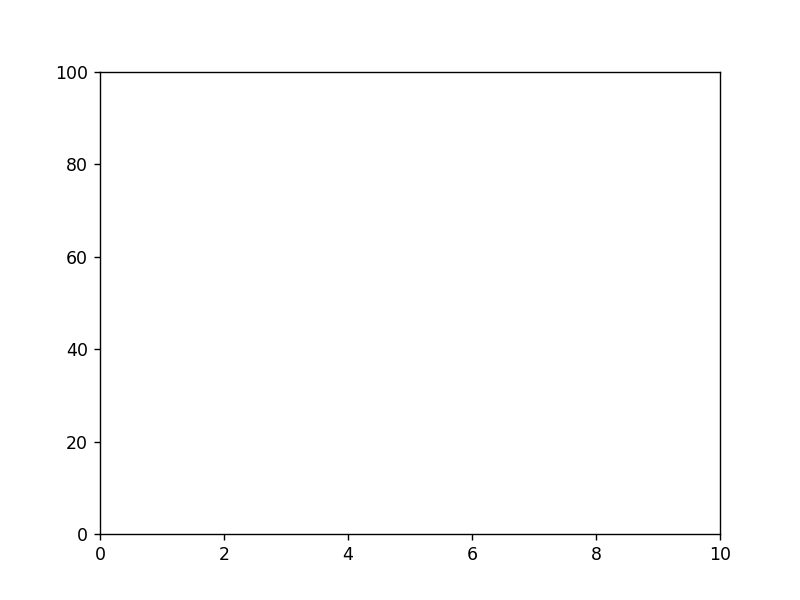

NameError: name 'h' is not defined

In [120]:
%matplotlib notebook
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

fig = plt.figure()
ax = plt.axes(xlim=(0,10), ylim=(0,100))

line, = ax.plot([], [])
curve, = ax.plot([], [])

t = np.linspace(0,10,100)
dt = 1e-2

x = t
y = t**2

k = 2 / (1 + 4 * t**2)**3/2

r = 1 / k
    
m = -(x - h) / (y -k)

def init():
    pass
    
def animate(i):
    
    plt.plot(1,1,'ko')
    line.set_data(x[:i],y[:i])
    
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=100, blit=True)
plt.show()

In [67]:
from sympy import *
import numpy as np
x = Symbol('x')
y = x**2 + 1

yprime = y.diff(x)
yprime

2*x